In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Project Task: Week 1**

In [132]:
df = pd.read_csv('Healthcare - Diabetes/health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1) Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# check for missing values

In [66]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Visually explore these variables using histograms. Treat the missing values accordingly.

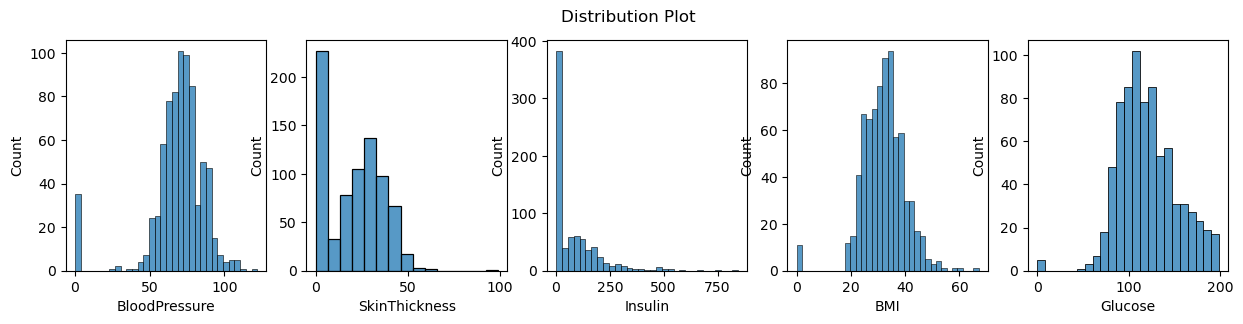

In [133]:
var = ['BloodPressure' ,'SkinThickness', 'Insulin', 'BMI' , 'Glucose']
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1,5,i+1)
    sns.histplot(df[var[i]])
plt.suptitle('Distribution Plot')
plt.show()

we have some zero values in these columns which is not right, we need to replace these zero values with from the distribution in each column, we will use the mean value for the purpose of this project

In [71]:
for column in var:
    mean = round(df[column].mean())
    df[column] = df[column].replace(0,mean)

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

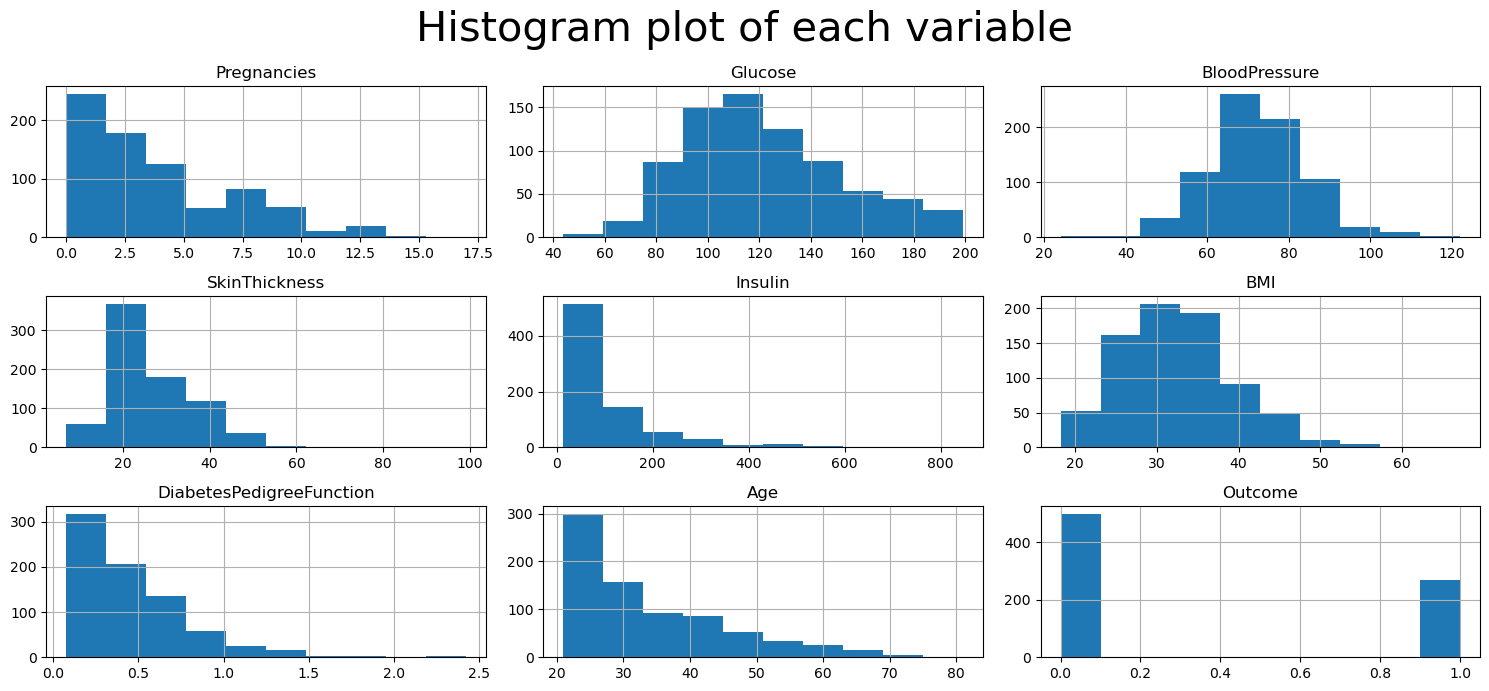

In [97]:
df.hist(figsize=(15,7))
plt.suptitle('Histogram plot of each variable', fontsize=30)
plt.tight_layout()
plt.show()

4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [108]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

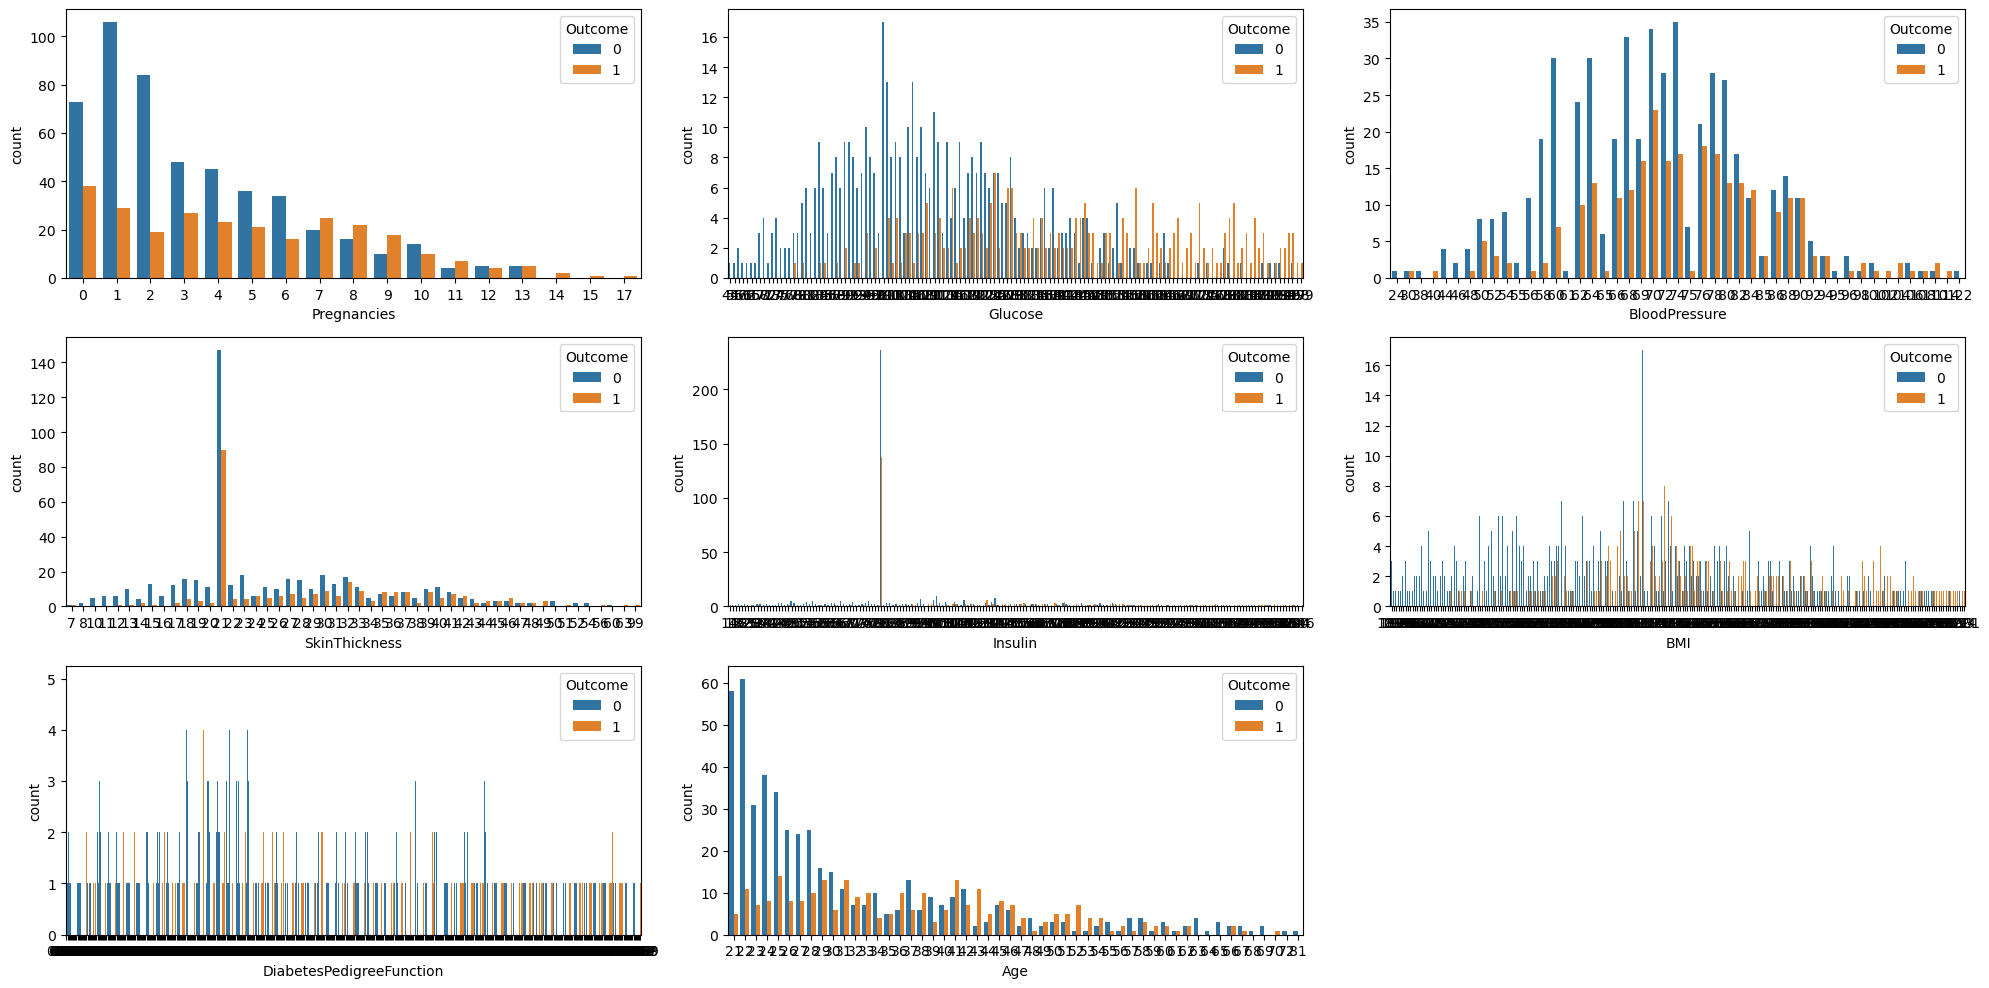

In [88]:
plt.figure(figsize=(20,10))
i=0
for column in df.columns[:-1]:
    i+= 1
    plt.subplot(3,3,i)
    sns.countplot(data=df,x=column,hue='Outcome')
plt.tight_layout()
plt.show()

5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

<Figure size 2000x1000 with 0 Axes>

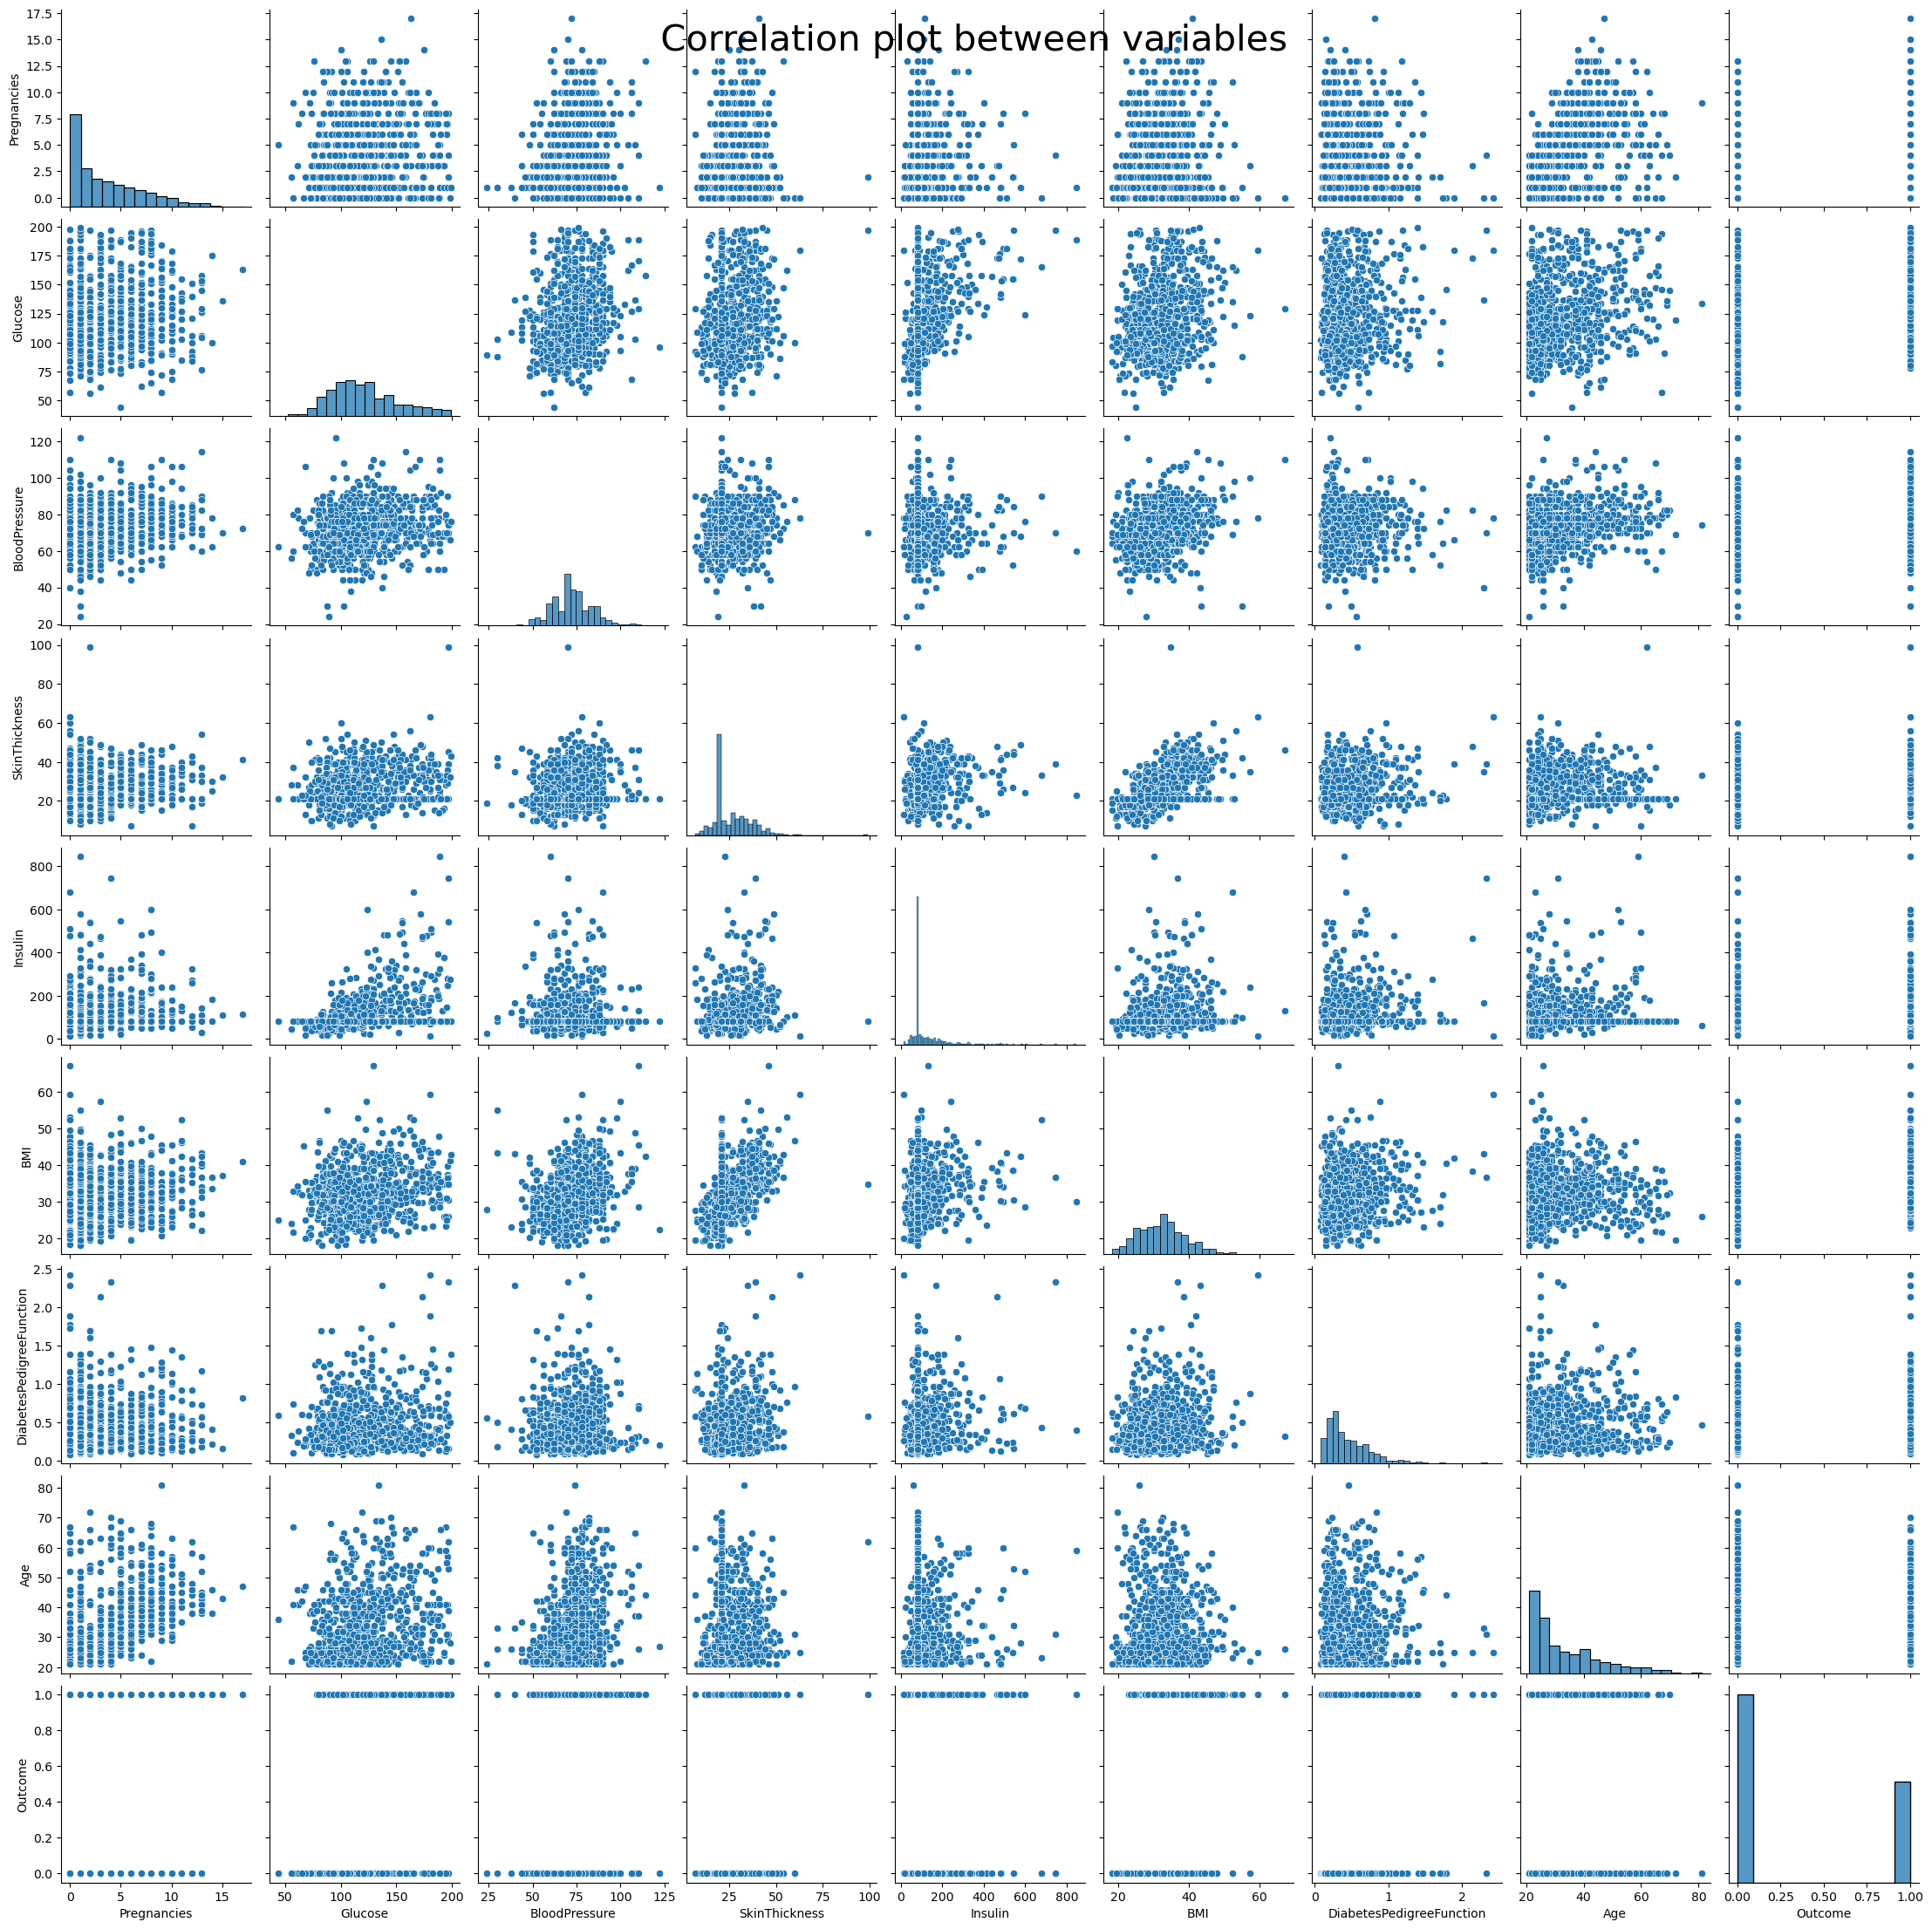

In [99]:
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.suptitle(' Correlation plot between variables', fontsize=30)
plt.show()

6. Perform correlation analysis. Visually explore it using a heat map.

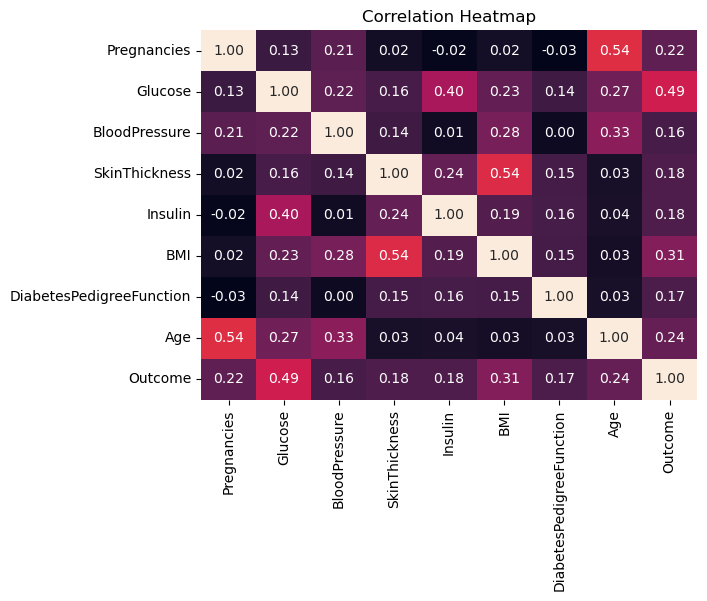

In [107]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',cbar=False)
plt.title('Correlation Heatmap')
plt.show()

# **Project Task: Week 2**

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report , accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,auc

In [110]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [114]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [120]:
models = {'Naive Bayes':GaussianNB(),
          'Random Forests':RandomForestClassifier(),
          'KNN':KNeighborsClassifier(),
          'Logistics Regression':LogisticRegression()}

# setting up pipeline to preprocess the trianing data before passing it to the |model

In [121]:
num_features = X.columns
transformer = ColumnTransformer([ ("numeric", MinMaxScaler(), num_features)])

for model in models:
    pipeline = Pipeline( [('transformer', transformer), ('model', models[model])])
    pipeline.fit(X_train,y_train)
    print(f'{model} Report')
    print(f'accuracy on training set {pipeline.score(X_train,y_train)}')
    pred = pipeline.predict(X_test)
    print(classification_report(y_test, pred))
    print(f'accuracy on validation set {accuracy_score(y_test, pred)}')
    print(f'balanced accuracy on validation set {balanced_accuracy_score(y_test, pred)}')
    print('''=====================================
            
            ''')

Naive Bayes Report
accuracy on training set 0.741042345276873
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

accuracy on validation set 0.7532467532467533
balanced accuracy on validation set 0.7393939393939394
            
            
Random Forests Report
accuracy on training set 1.0
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

accuracy on validation set 0.7532467532467533
balanced accuracy on validation set 0.7474747474747474
     

# Best Model Variable Importance

In [129]:
importance = pipeline.named_steps['model'].coef_[0]
feature = pipeline.named_steps['transformer'].get_feature_names_out()
feature_imp = list(zip(feature,importance))
feature_imp_df = pd.DataFrame(feature_imp,columns=['feature','importance']).sort_values(by='importance',ascending=False)
feature_imp_df

,feature,importance
1,numeric__Glucose,4.180704
5,numeric__BMI,2.870093
7,numeric__Age,1.566597
6,numeric__DiabetesPedigreeFunction,1.000644
0,numeric__Pregnancies,0.980181
3,numeric__SkinThickness,0.538146
2,numeric__BloodPressure,-0.155190
4,numeric__Insulin,-0.283343


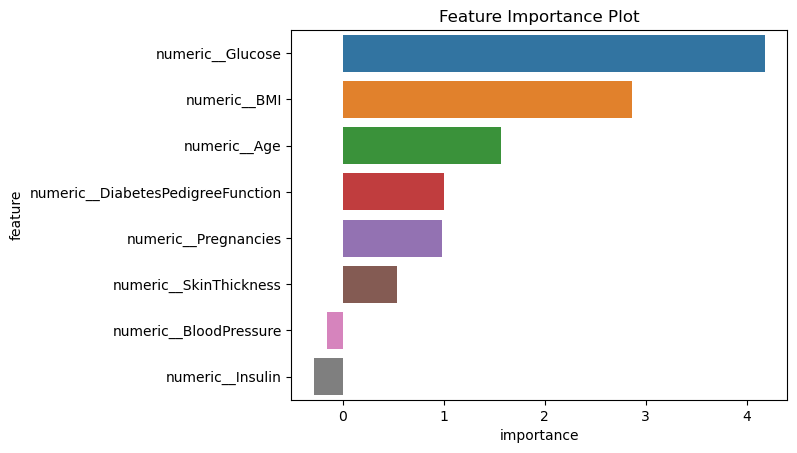

In [131]:
sns.barplot(data=feature_imp_df,x='importance',y='feature')
plt.title('Feature Importance Plot')
plt.show()